In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import statistics

draft_pie_data = pd.read_csv('/Users/josephhartono/Documents/GitHub/NBA-Draft-Biola-Summer-Research/draft_nba_data_2000_2016_w_PIE_and_salaries_and college_stats.csv')
draft_pick_data = pd.read_csv('/Users/josephhartono/Documents/GitHub/NBA-Draft-Biola-Summer-Research/draft_data_2000_2016_no_empty_cells_w_draft_pick.csv')
draft_ranking_data = pd.read_csv('/Users/josephhartono/Documents/GitHub/NBA-Draft-Biola-Summer-Research/draft_grades_2009_2016.csv')

t_font = 'monospace'
label_font = 'serif'
t_font_size = 12 
label_font_size = 10
figure_size = (8,6)


1. pie score vs overall draft pick DONE
7. pie score vs draft pick vs normalized salary DONE
2. normalized salary vs overall draft pick DONE


3. barplot of salaries per position DONE
4. barplot of average pie score per position DONE
5. ranking vs pie score DONE
6. ranking vs pie score vs salary 


# pie score vs draft pick vs normalized salary

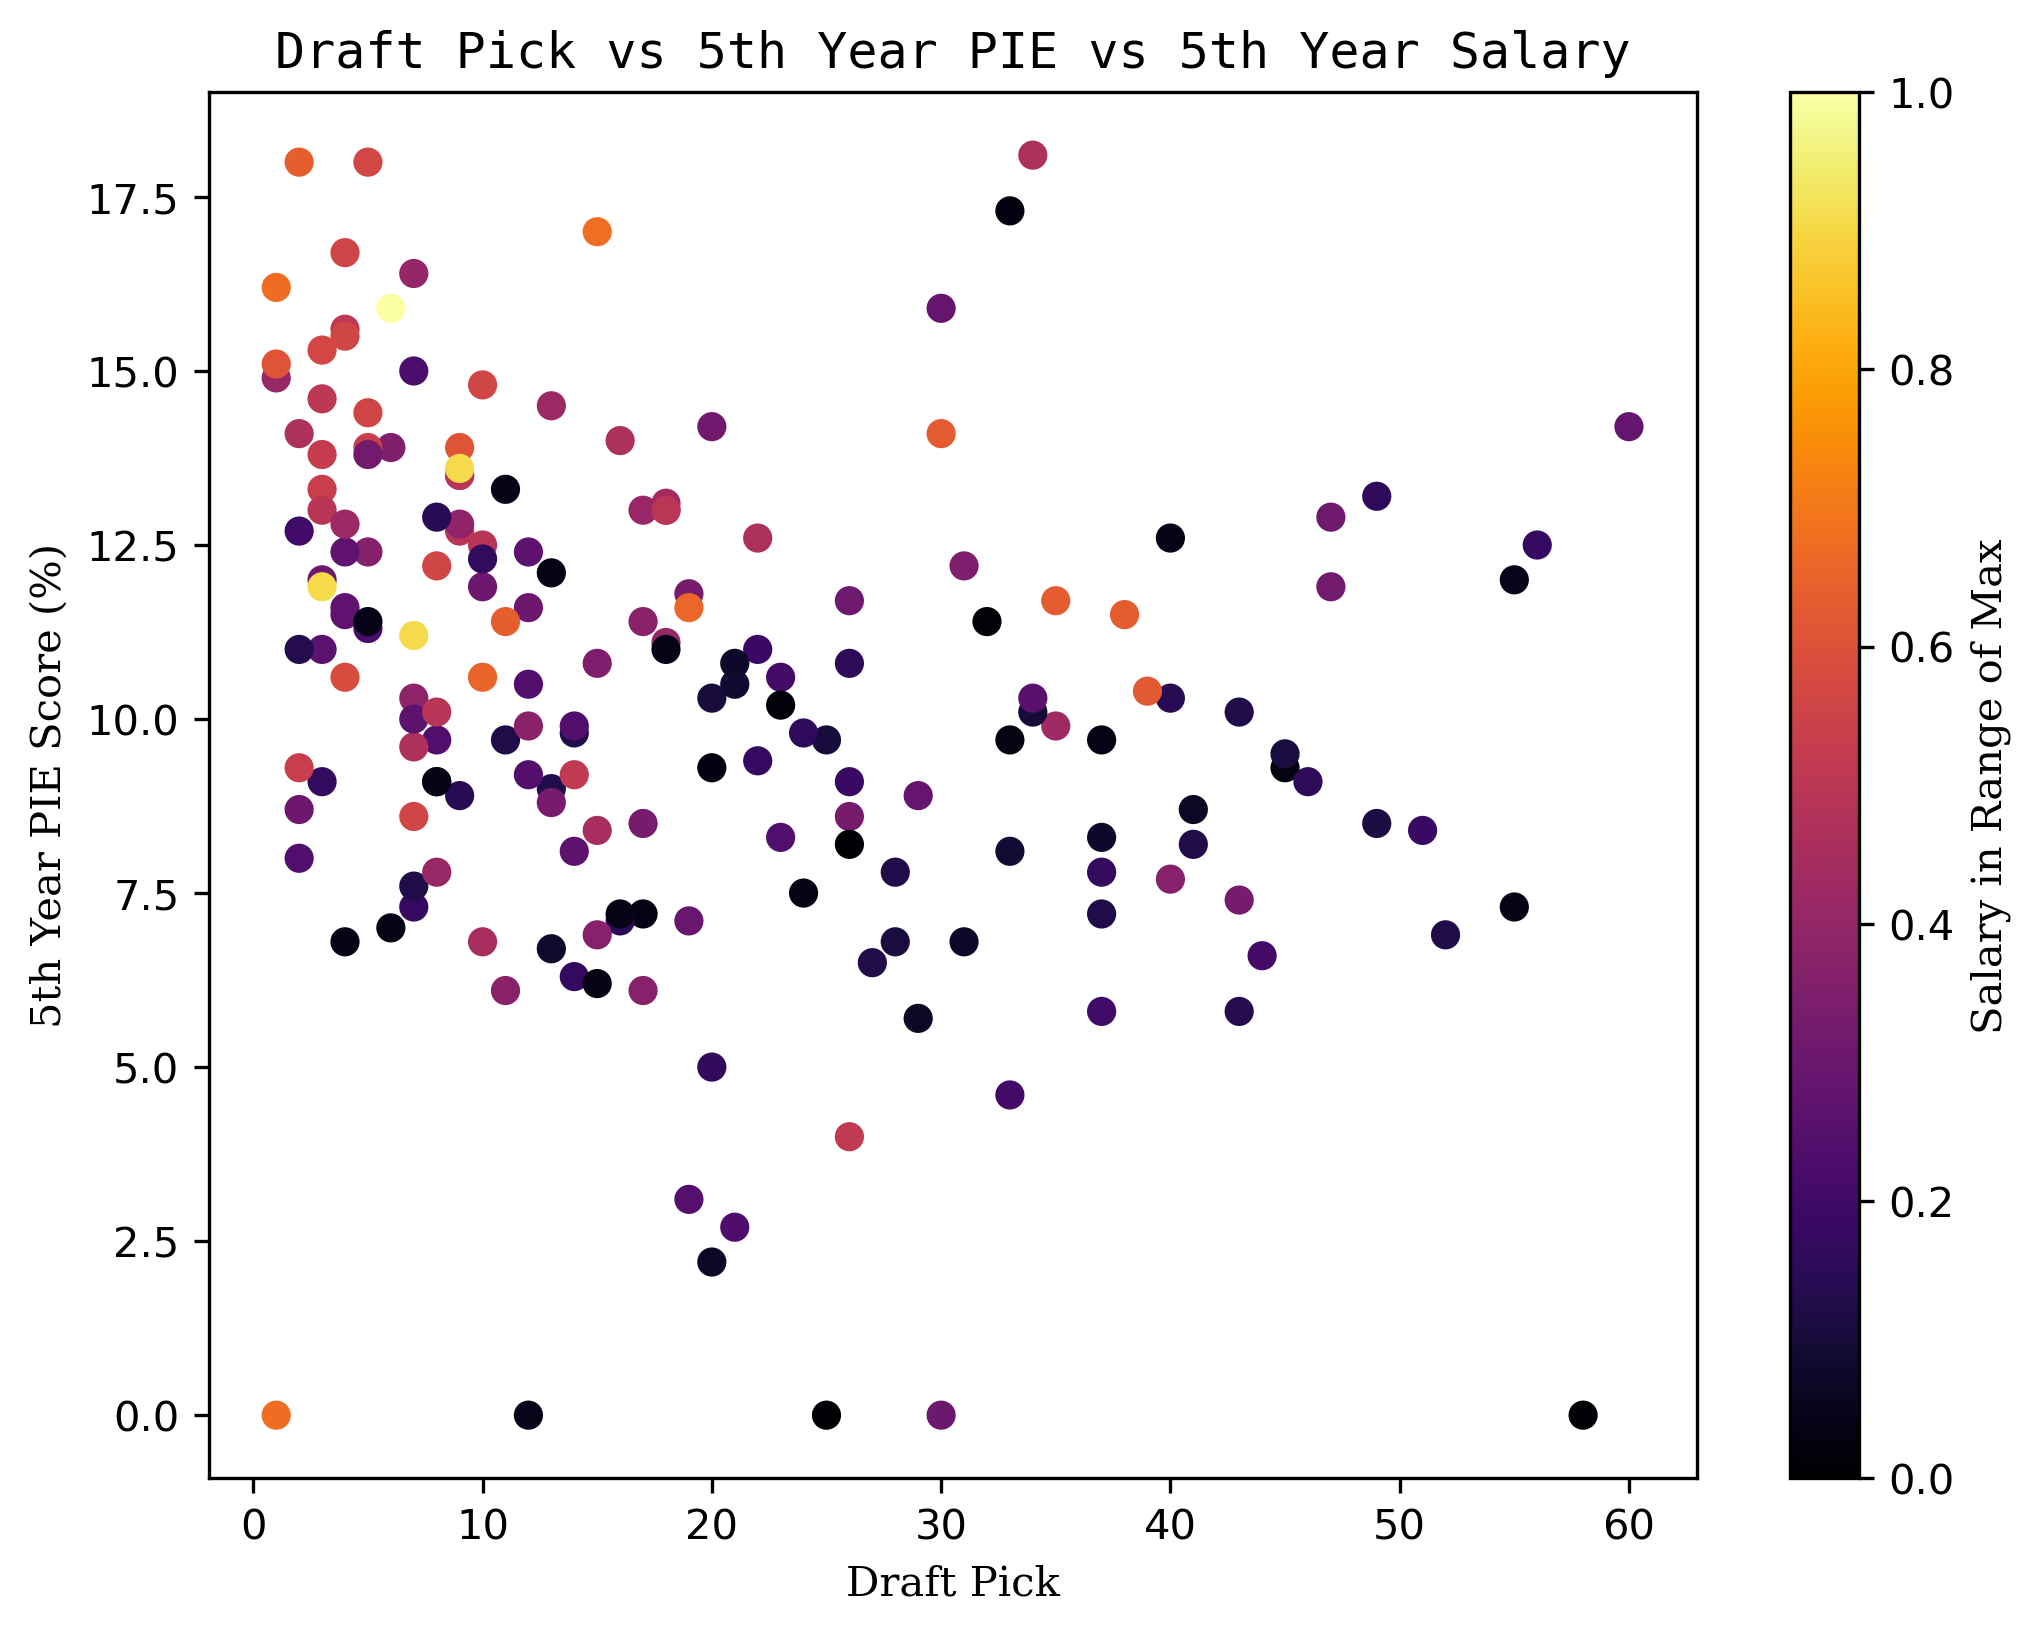

In [2]:
def NormalizeData(data):
    return (data - min(data)) / (max(data) - min(data))


pie_data = draft_pie_data[draft_pie_data['DRAFT_CLASS'] < 2013]
#display(graph_data)

#df = graph_data[['PIE_5_YR', '5th_YR_SALARY', '5th_YR_SALARY_TAG']]


pie_data = pie_data[pie_data['5th_YR_SALARY_TAG'] != "no contract"]
#draft_pick_data = draft_pick_data[draft_pick_data['DRAFT_NUMBER'] != -1]
#display(draft_pick_data)

pie_names = pie_data['PLAYER_NAME_x'].values
#print(draft_pie_names)
#picks = draft_pick_data[draft_pick_data.isn(draft_pie_names)].values
picks = []
#pie = draft_pie_data['PIE_5_YR'].values
for name in pie_names:
    pick = draft_pick_data[(draft_pick_data.PLAYER_NAME_x == name)]
    #print(name)
    picks.append(pick['DRAFT_NUMBER'].values[0])

    
#print(len(picks),len(pie_data))
pie_data['PICK'] = picks
pie_data = pie_data[(pie_data['PICK'] > -1)]
pie = pie_data['PIE_5_YR'].values
final_picks = list(filter(lambda picks: picks > -1, picks))


salary = NormalizeData(pie_data['5th_YR_SALARY'])
salary = salary
#print(len(salary),len(final_picks),len(pie), salary)
#df = df.rename(columns={"PIE_5_YR":"x"})
#df = df.rename(columns={"5th_YR_SALARY":"y"})
#df = df.rename(columns={"5th_YR_SALARY_TAG":"z"})

plt.figure(dpi=300,figsize=figure_size)
#plt.grid()
plt.scatter(x=final_picks, y=pie, c=salary, cmap="inferno")
plt.colorbar().set_label(label="Salary in Range of Max",font = label_font, size = label_font_size)
plt.xlabel("Draft Pick", font = label_font, fontsize = label_font_size)
plt.ylabel("5th Year PIE Score (%)",font = label_font,fontsize = label_font_size)
plt.title("Draft Pick vs 5th Year PIE vs 5th Year Salary", font = t_font, fontsize = t_font_size)
plt.show()

# barplot of average pie score per position

<Figure size 1920x1440 with 0 Axes>

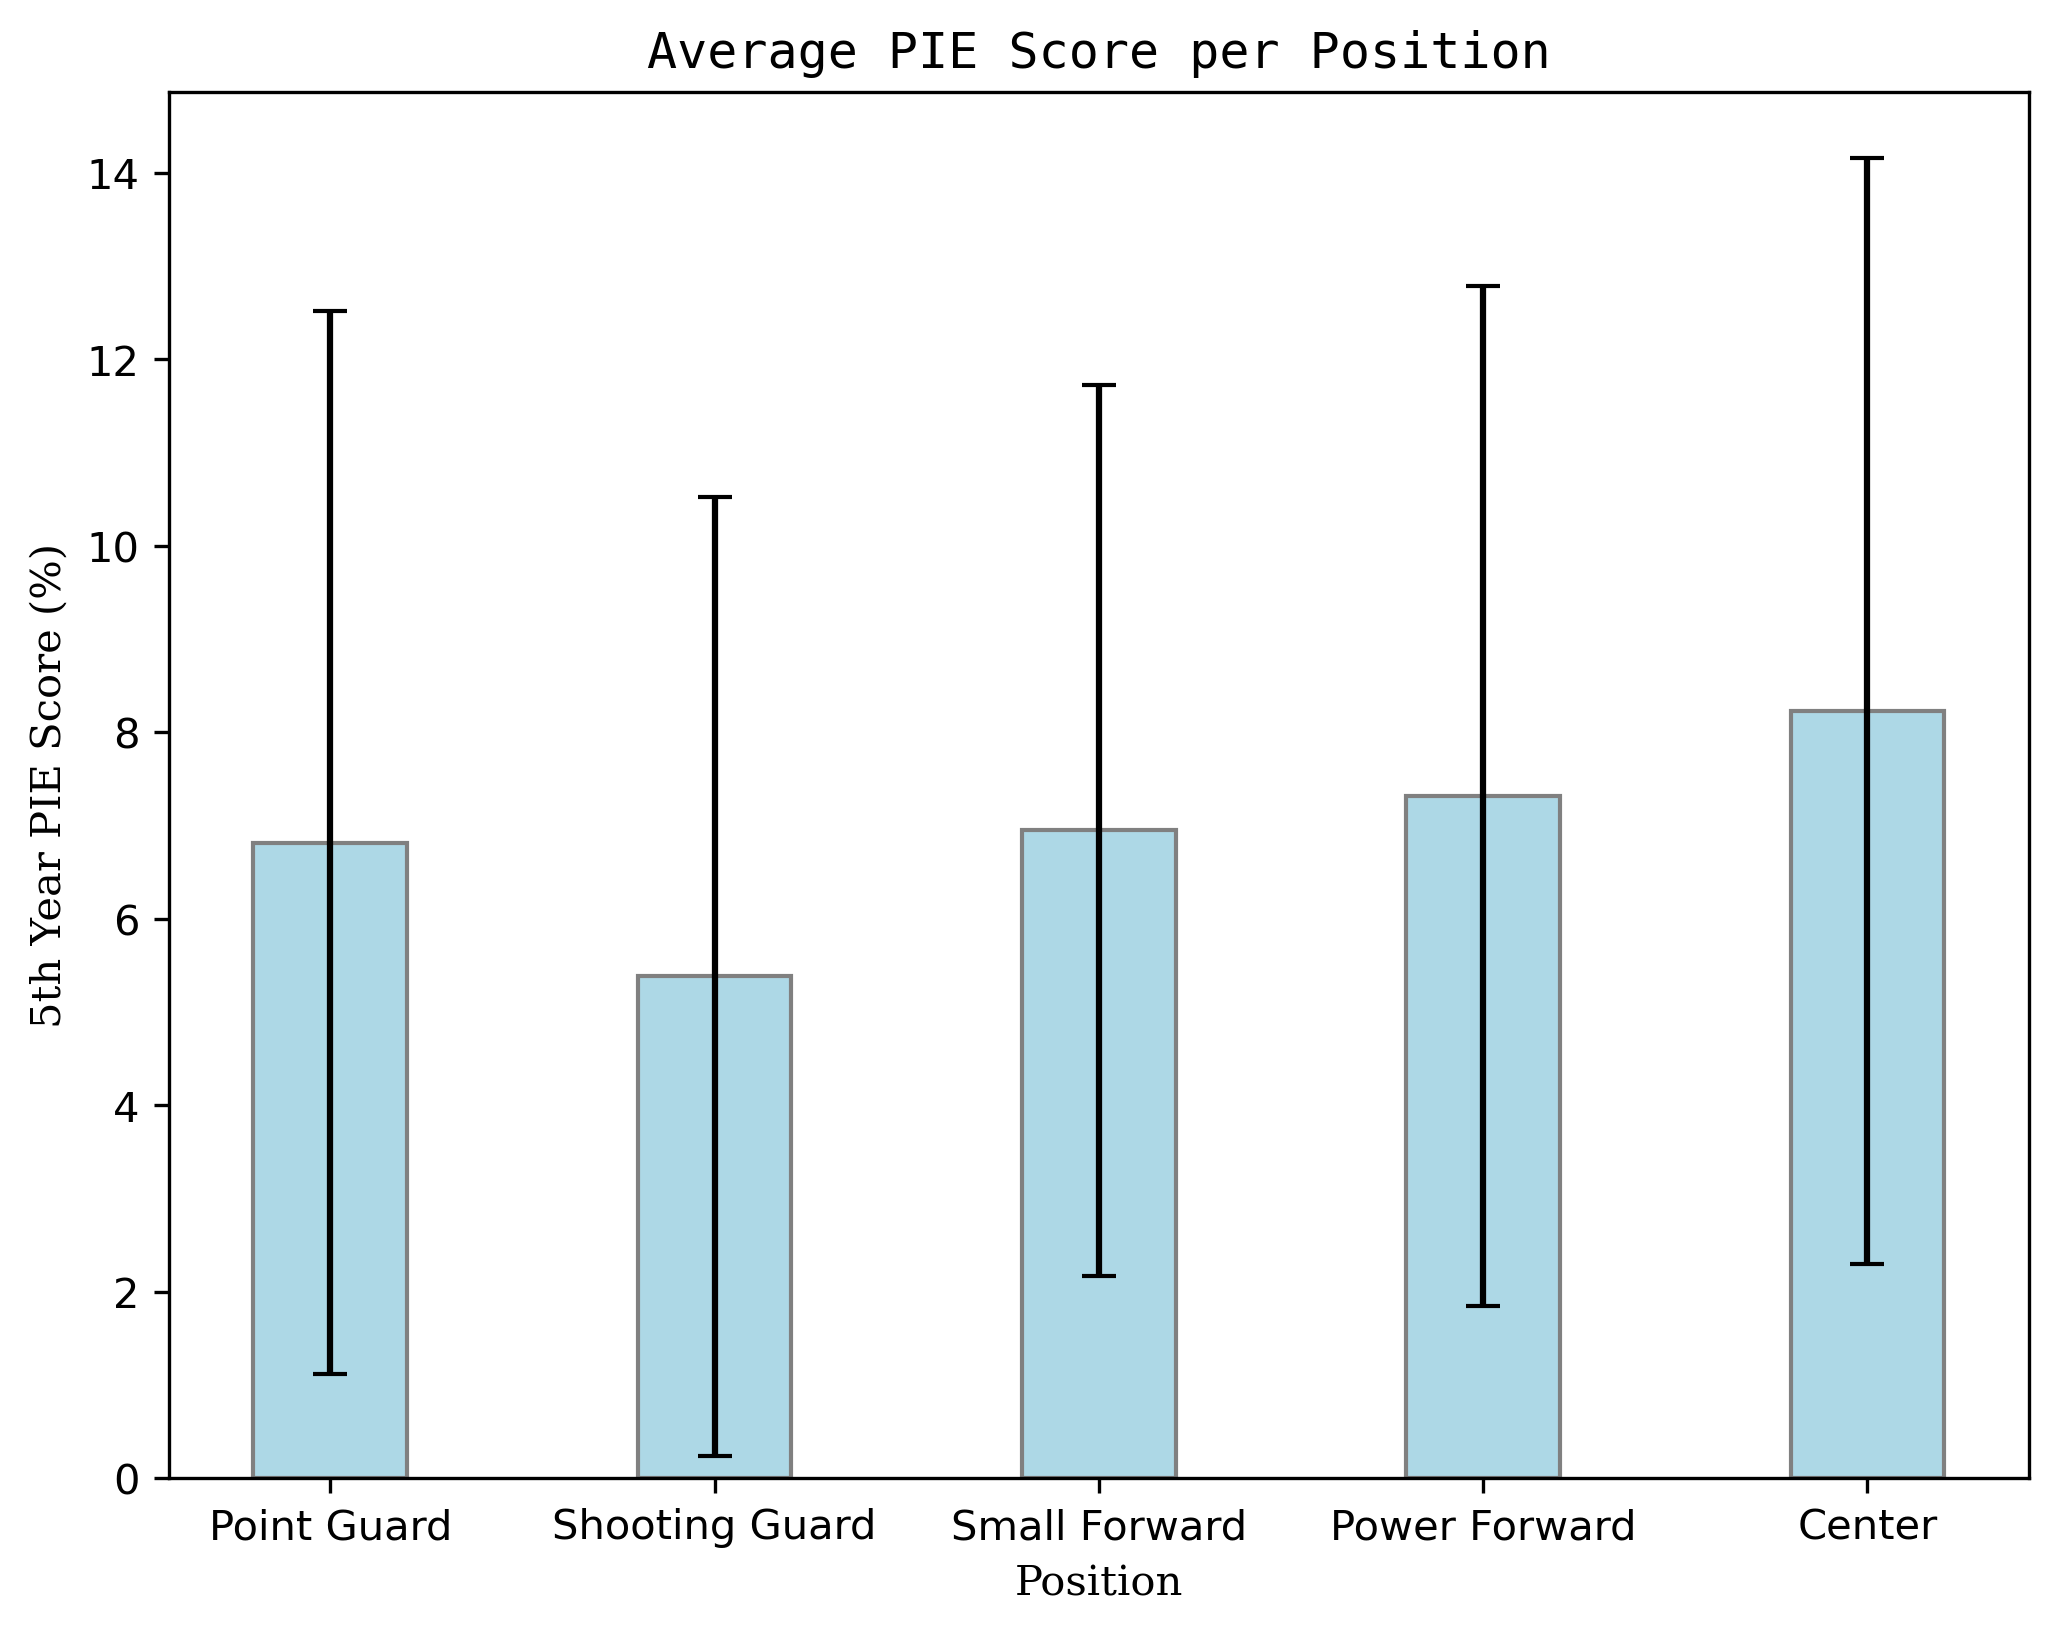

In [3]:
plt.figure(dpi=300)#, figsize = (10, 5))


temp_df = draft_pie_data
position = draft_pie_data['POSITION_x']

mapping = {'PG':1,'PG-SG':1,'PG-SF':1,'PG-PF':1,'PG-C':1,
           'SG':2,'SG-PG':2,'SG-SF':2,'SG-PF':2,'SG-C':2,
           'SF':3,'SF-PG':3,'SF-SG':3,'SF-PF':3,'SF-C':3,
           'PF':4,'PF-PG':4,'PF-SG':4,'PF-SF':4,'PF-C':4,
           'C':5,'C-PG':5,'C-SG':5,'C-SF':5,'C-PF':5}
temp_df = temp_df.replace({'POSITION_x':mapping})

#print(temp_df['POSITION_x'])

PG = temp_df[(temp_df['POSITION_x'] == 1)]
SG = temp_df[(temp_df['POSITION_x'] == 2)]
SF = temp_df[(temp_df['POSITION_x'] == 3)]
PF = temp_df[(temp_df['POSITION_x'] == 4)]
C = temp_df[(temp_df['POSITION_x'] == 5)]

#print(statistics.stdev(C['PIE_5_YR']), np.mean(C['PIE_5_YR']))
# creating the bar plot
std = statistics.stdev(temp_df['PIE_5_YR'])
#print(std)
plt.figure(dpi=300,figsize=figure_size)
plt.bar('Point Guard', np.mean(PG['PIE_5_YR']), yerr = statistics.stdev(PG['PIE_5_YR']), color ='lightblue',
        edgecolor = 'grey', width = 0.4,capsize=4)
plt.bar('Shooting Guard', np.mean(SG['PIE_5_YR']), yerr = statistics.stdev(SG['PIE_5_YR']), color ='lightblue',
        edgecolor = 'grey', width = 0.4,capsize=4)
plt.bar('Small Forward', np.mean(SF['PIE_5_YR']), yerr = statistics.stdev(SF['PIE_5_YR']), color ='lightblue',
        edgecolor = 'grey', width = 0.4,capsize=4)
plt.bar('Power Forward', np.mean(PF['PIE_5_YR']), yerr = statistics.stdev(PF['PIE_5_YR']), color ='lightblue',
        edgecolor = 'grey', width = 0.4,capsize=4)
plt.bar('Center', np.mean(C['PIE_5_YR']), yerr = statistics.stdev(C['PIE_5_YR']), color ='lightblue',
        edgecolor = 'grey', width = 0.4,capsize=4)
 
plt.xlabel("Position", font = label_font, fontsize = label_font_size)
plt.ylabel("5th Year PIE Score (%)", font = label_font, fontsize = label_font_size)
#plt.title("Students enrolled in different courses")
plt.title("Average PIE Score per Position", font = t_font, fontsize = t_font_size)
plt.show()



# violinplot of salaries per position

<Figure size 1920x1440 with 0 Axes>

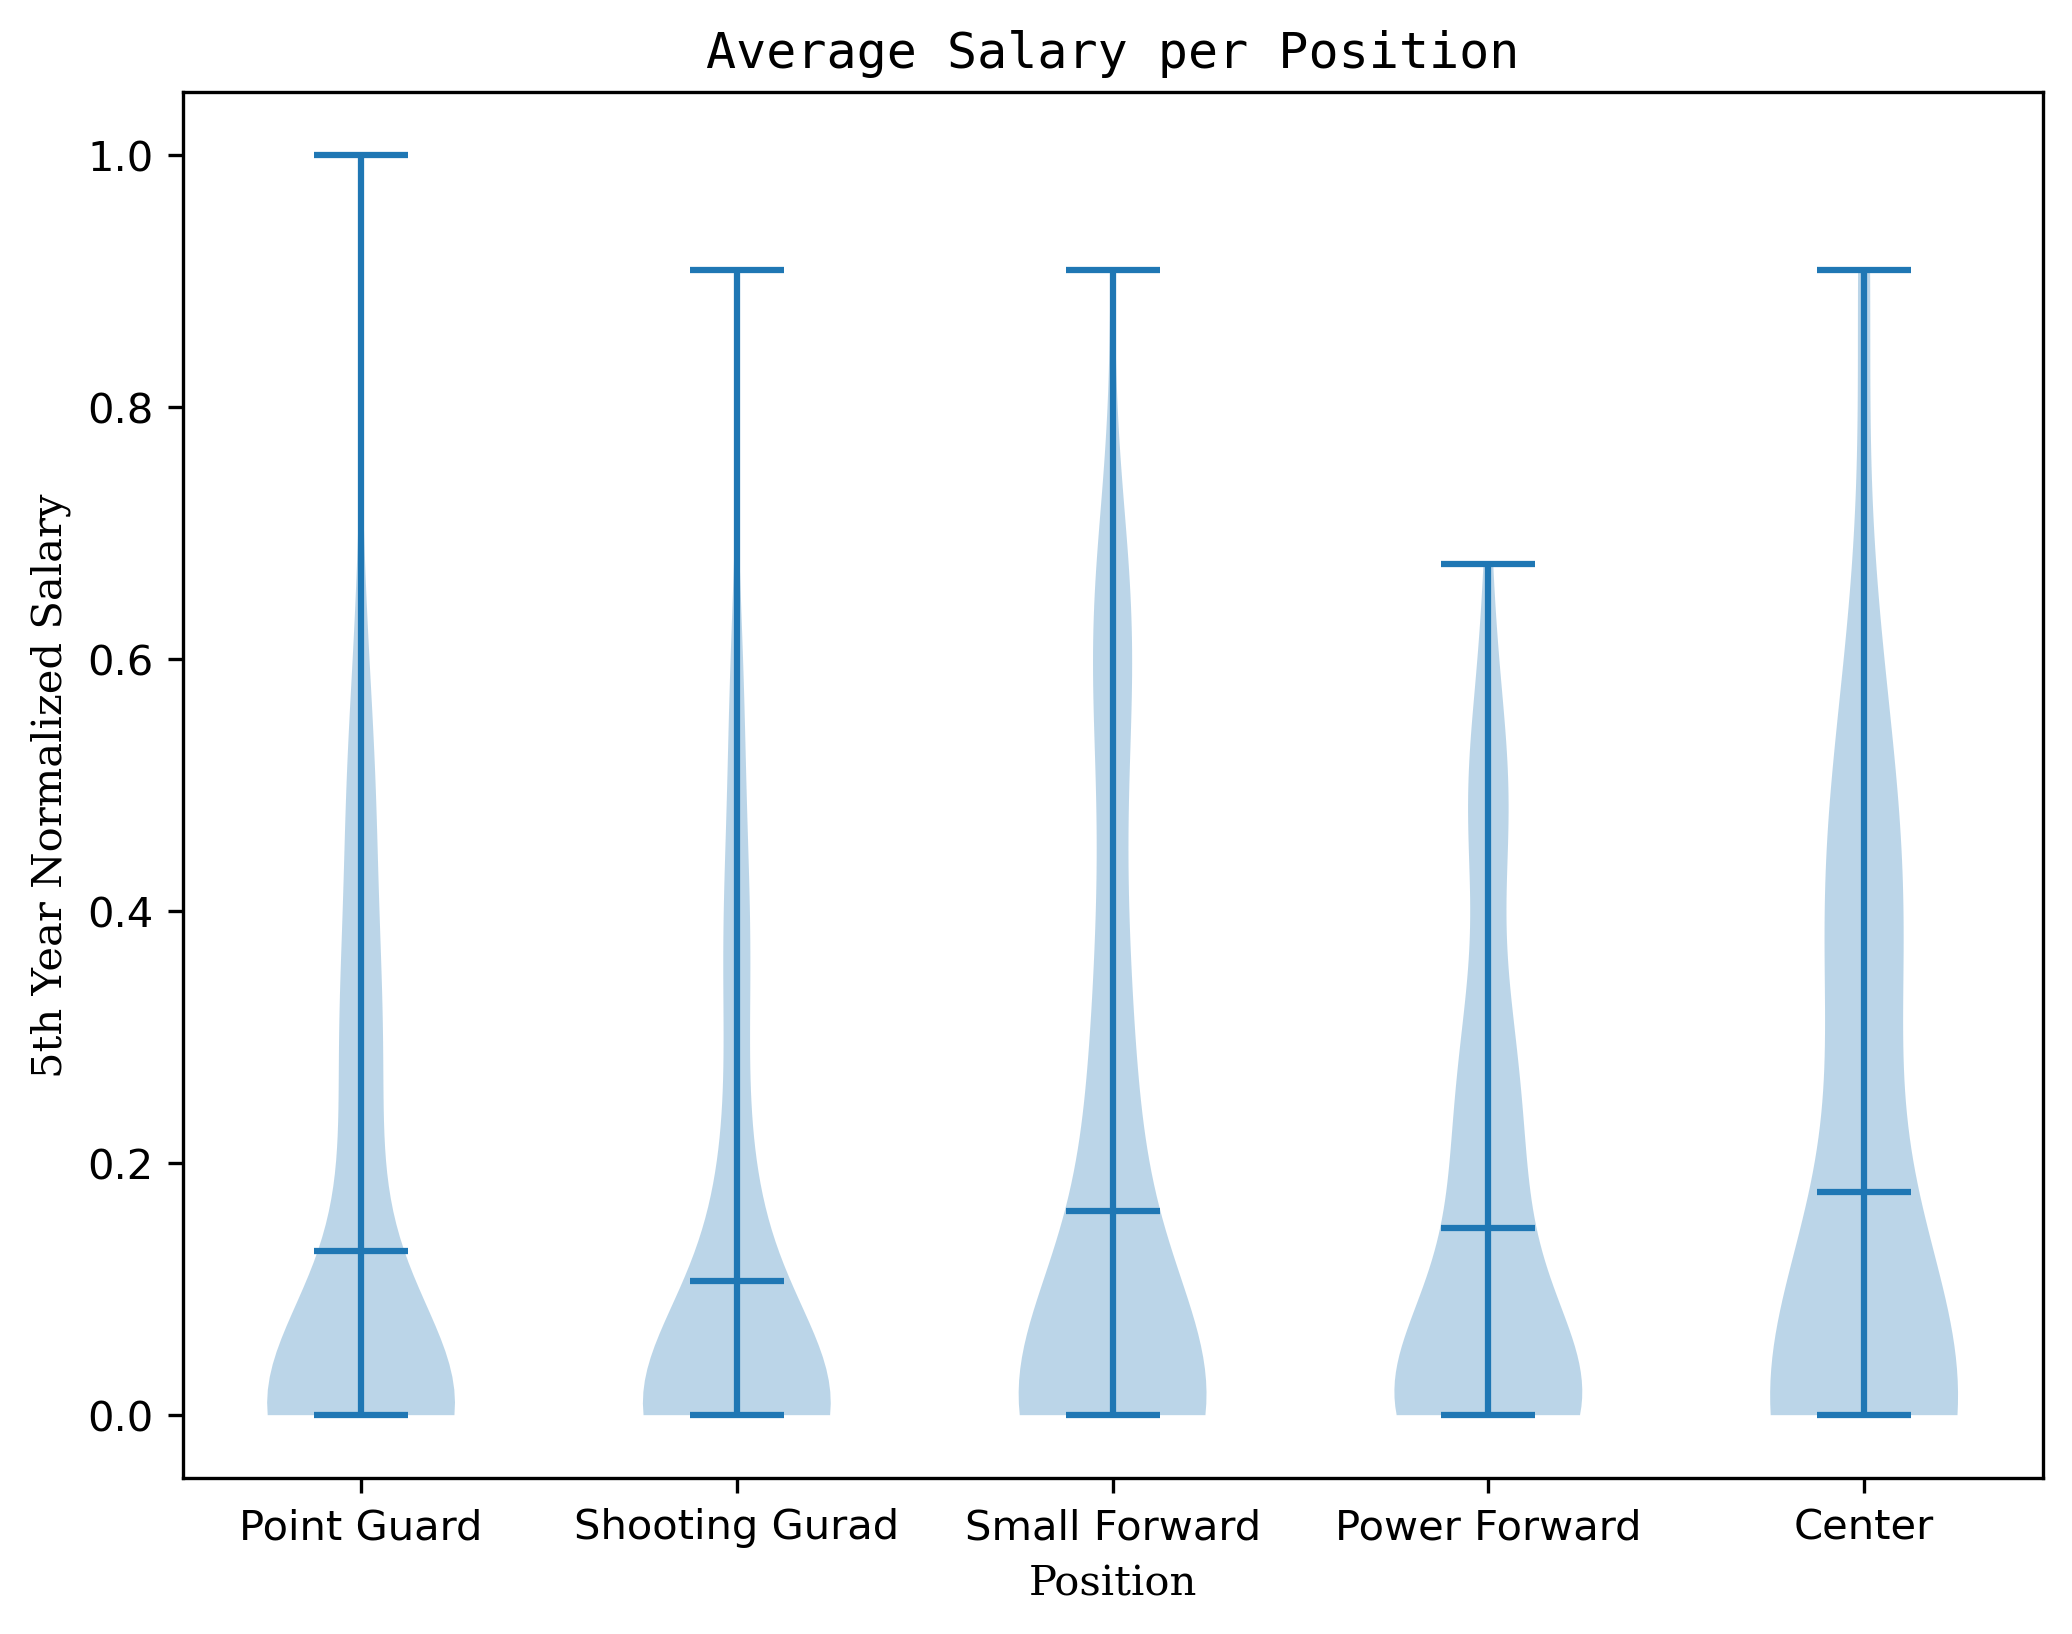

In [4]:
def NormalizeData(data):
    return (data - min(data)) / (max(data) - min(data))

plt.figure(dpi=300)#, figsize = (10, 5))


temp_df = draft_pie_data
position = draft_pie_data['POSITION_x']

mapping = {'PG':1,'PG-SG':1,'PG-SF':1,'PG-PF':1,'PG-C':1,
           'SG':2,'SG-PG':2,'SG-SF':2,'SG-PF':2,'SG-C':2,
           'SF':3,'SF-PG':3,'SF-SG':3,'SF-PF':3,'SF-C':3,
           'PF':4,'PF-PG':4,'PF-SG':4,'PF-SF':4,'PF-C':4,
           'C':5,'C-PG':5,'C-SG':5,'C-SF':5,'C-PF':5}
temp_df = temp_df.replace({'POSITION_x':mapping})

#print(temp_df['POSITION_x'])

temp_df['NORM_SALARY'] = NormalizeData(temp_df['5th_YR_SALARY'])

PG = temp_df[(temp_df['POSITION_x'] == 1)]
SG = temp_df[(temp_df['POSITION_x'] == 2)]
SF = temp_df[(temp_df['POSITION_x'] == 3)]
PF = temp_df[(temp_df['POSITION_x'] == 4)]
C = temp_df[(temp_df['POSITION_x'] == 5)]

#print(statistics.stdev(C['PIE_5_YR']), np.mean(C['PIE_5_YR']))
# creating the bar plot
std = statistics.stdev(temp_df['NORM_SALARY'])
#print(std)
plt.figure(dpi=300,figsize=figure_size)
# plt.bar('Point Guard', np.mean(PG['NORM_SALARY']), yerr = statistics.stdev(PG['NORM_SALARY']), color ='lightblue',
#         edgecolor = 'grey', width = 0.4,capsize=4)
# plt.bar('Shooting Guard', np.mean(SG['NORM_SALARY']), yerr = statistics.stdev(SG['NORM_SALARY']), color ='lightblue',
#         edgecolor = 'grey', width = 0.4,capsize=4)
# plt.bar('Small Forward', np.mean(SF['NORM_SALARY']), yerr = statistics.stdev(SF['NORM_SALARY']), color ='lightblue',
#         edgecolor = 'grey', width = 0.4,capsize=4)
# plt.bar('Power Forward', np.mean(PF['NORM_SALARY']), yerr = statistics.stdev(PF['NORM_SALARY']), color ='lightblue',
#         edgecolor = 'grey', width = 0.4,capsize=4)
# plt.bar('Center', np.mean(C['NORM_SALARY']), yerr = statistics.stdev(C['NORM_SALARY']), color ='lightblue',
#         edgecolor = 'grey', width = 0.4,capsize=4)
# plt.bar('Point Guard', np.mean(PG['NORM_SALARY']), color ='lightblue',
#         edgecolor = 'grey', width = 0.4)
# plt.bar('Shooting Guard', np.mean(SG['NORM_SALARY']), color ='lightblue',
#         edgecolor = 'grey', width = 0.4)
# plt.bar('Small Forward', np.mean(SF['NORM_SALARY']), color ='lightblue',
#         edgecolor = 'grey', width = 0.4)
# plt.bar('Power Forward', np.mean(PF['NORM_SALARY']), color ='lightblue',
#         edgecolor = 'grey', width = 0.4)
# plt.bar('Center', np.mean(C['NORM_SALARY']), color ='lightblue',
#         edgecolor = 'grey', width = 0.4)

random_collection = [PG['NORM_SALARY'], SG['NORM_SALARY'], SF['NORM_SALARY'],PF['NORM_SALARY'],C['NORM_SALARY']]
plt.violinplot(random_collection,showmeans = True)
plt.xticks(ticks = [1,2,3,4,5], labels = ['Point Guard','Shooting Gurad','Small Forward','Power Forward','Center'])
plt.xlabel("Position", font = label_font, fontsize = label_font_size)
plt.ylabel("5th Year Normalized Salary", font = label_font, fontsize = label_font_size)
#plt.title("Students enrolled in different courses")
plt.title("Average Salary per Position", font = t_font, fontsize = t_font_size)
plt.show()



# pie score vs overall draft pick

/Users/josephhartono/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


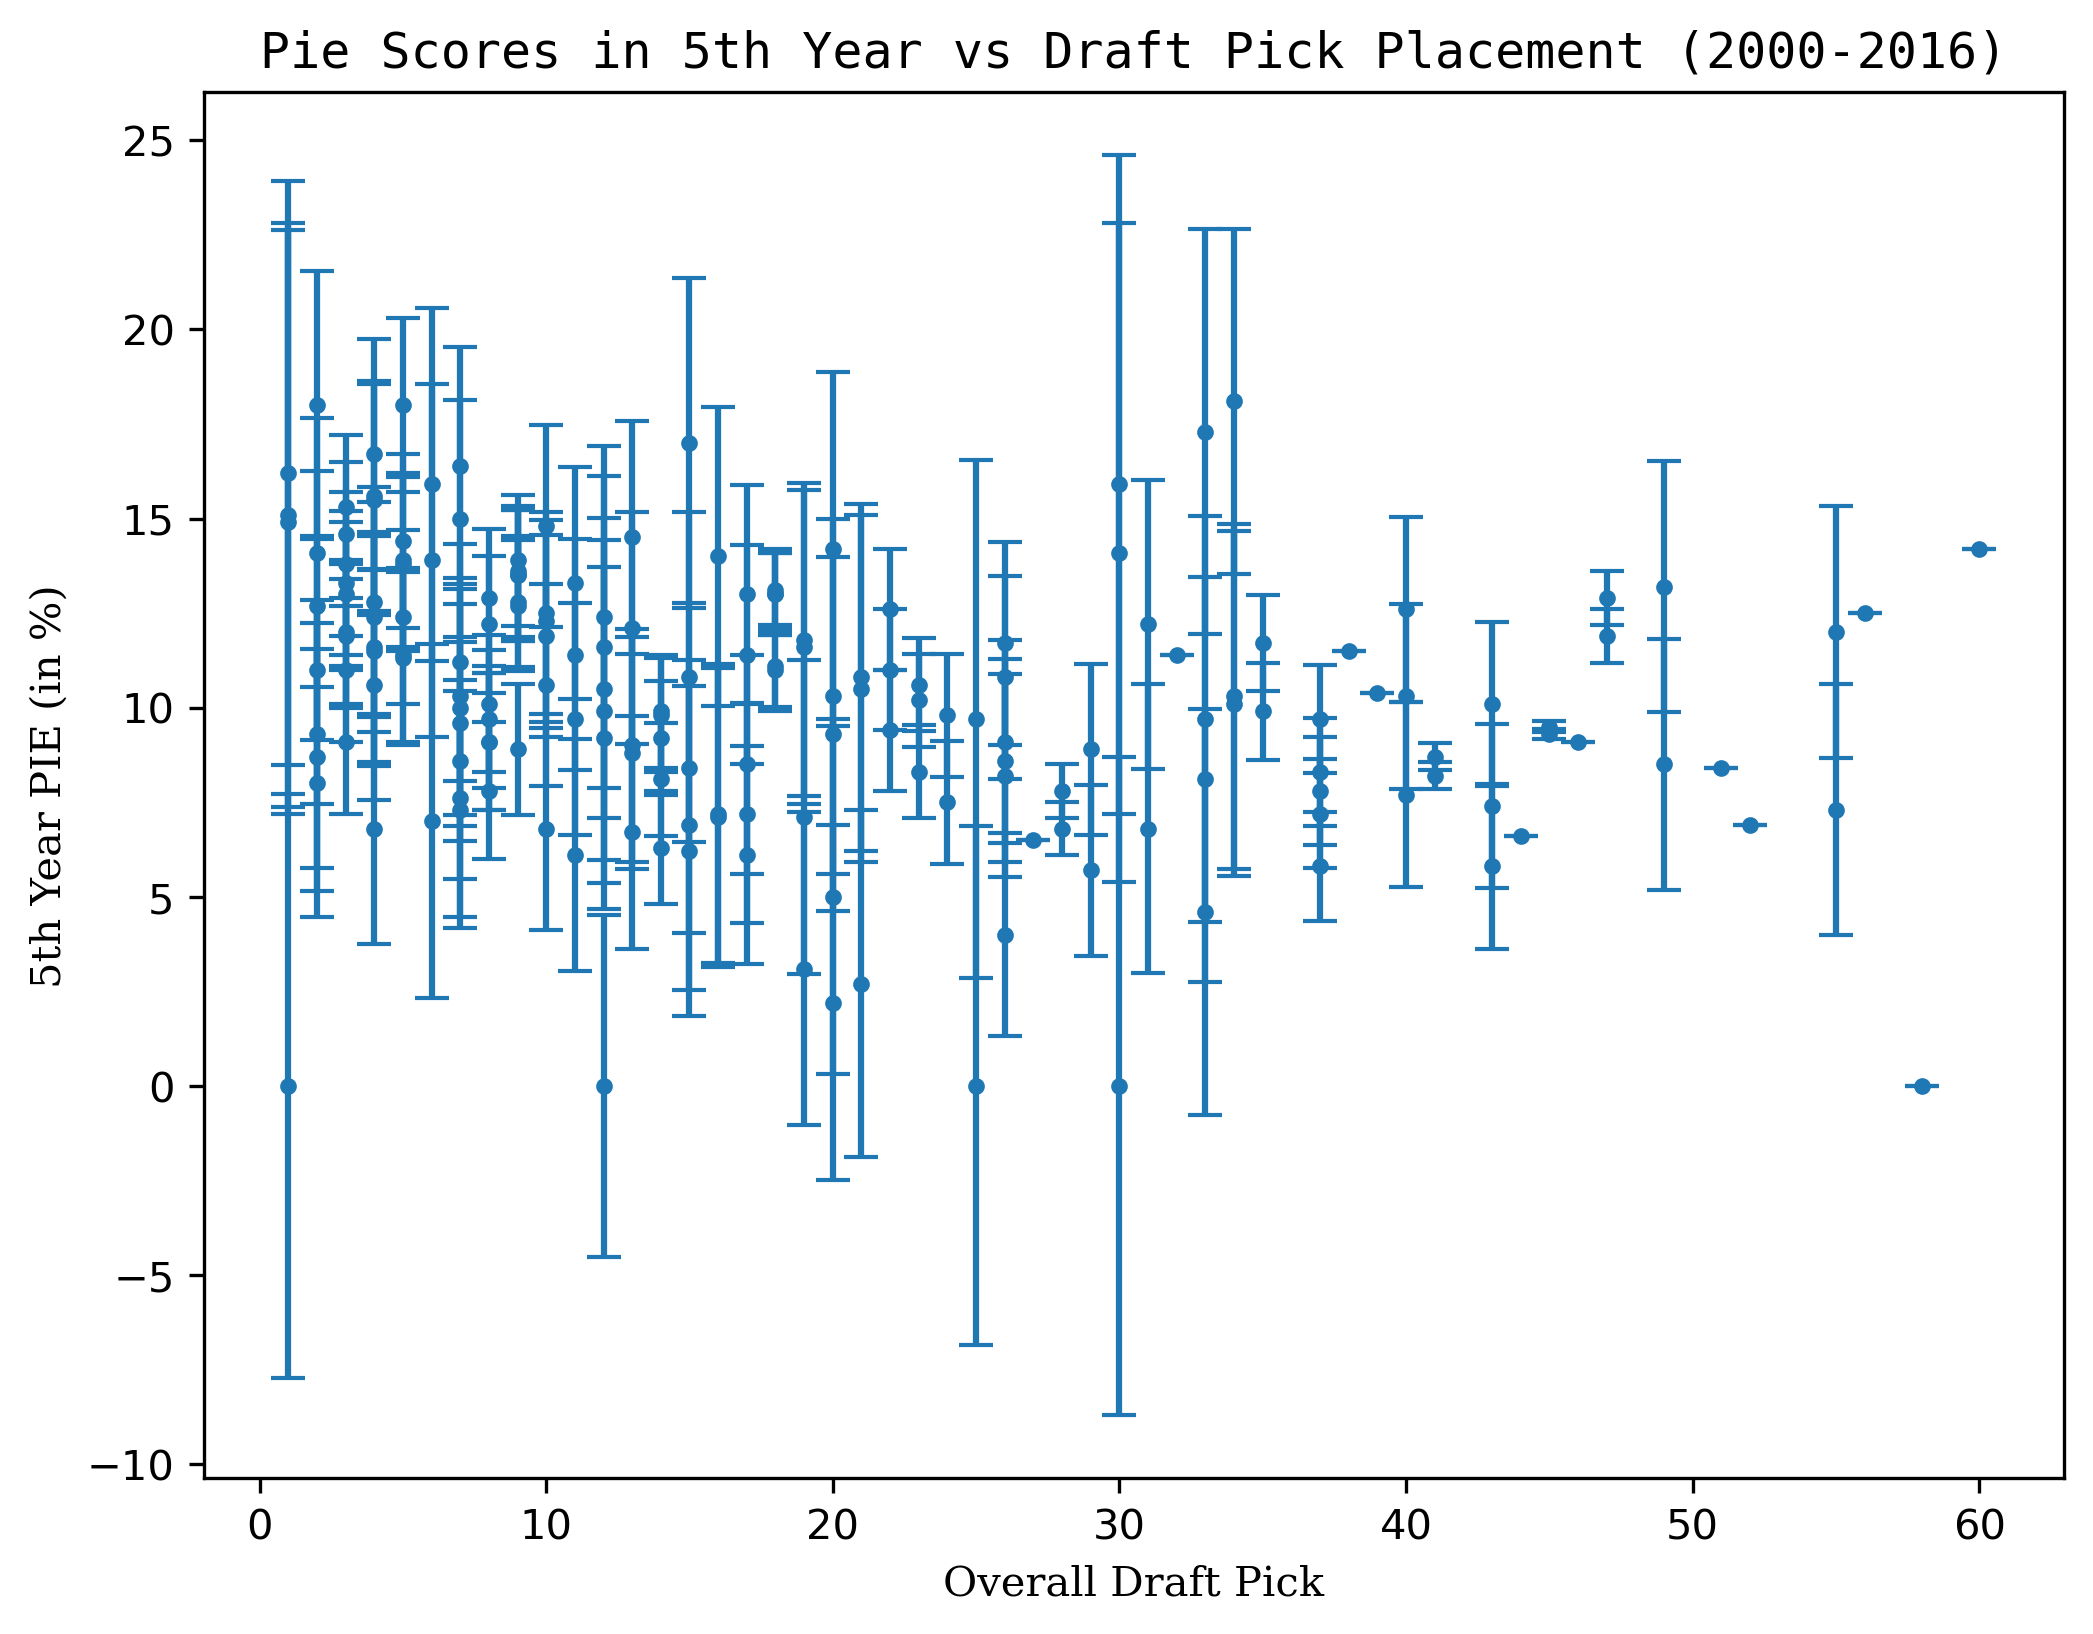

In [5]:
pie_data = draft_pie_data[draft_pie_data['5th_YR_SALARY_TAG'] != "no contract"]
#draft_pick_data = draft_pick_data[draft_pick_data['DRAFT_NUMBER'] != -1]
#display(draft_pick_data)

pie_names = pie_data['PLAYER_NAME_x'].values
#print(draft_pie_names)
#picks = draft_pick_data[draft_pick_data.isn(draft_pie_names)].values
picks = []
#pie = draft_pie_data['PIE_5_YR'].values
for name in pie_names:
    pick = draft_pick_data[(draft_pick_data.PLAYER_NAME_x == name)]
    #print(name)
    picks.append(pick['DRAFT_NUMBER'].values[0])

#print(len(picks))
pie_data['PICK'] = picks
pie_data = pie_data[(pie_data['PICK'] > -1)]
pie = pie_data['PIE_5_YR'].values
final_picks = list(filter(lambda picks: picks > -1, picks))

error = []
#print(pie_data.iloc[0])
for point in range(len(pie_data)):
    #print(point)
    row = pie_data.iloc[point]
    c_pick = row['PICK']
    #print(c_pick)
    pick_class = pie_data[(pie_data['PICK'] == c_pick)]
    if len(pick_class) > 1:
        std = statistics.stdev(pick_class['PIE_5_YR'])
    else:
        std = 0
    error.append(std)

    
#print(len(final_picks), len(pie_data),len(error))
#print(error)
plt.figure(dpi=300,figsize=figure_size)
plt.errorbar(final_picks, pie , yerr = error, marker='o', linestyle='', markersize=3, label=name,capsize=4)

plt.title("Pie Scores in 5th Year vs Draft Pick Placement (2000-2016)", font = t_font, fontsize = t_font_size)
plt.xlabel('Overall Draft Pick', font = label_font, fontsize = label_font_size)
plt.ylabel('5th Year PIE (in %)', font = label_font, fontsize = label_font_size)
plt.show()

# Ranking vs. PIE

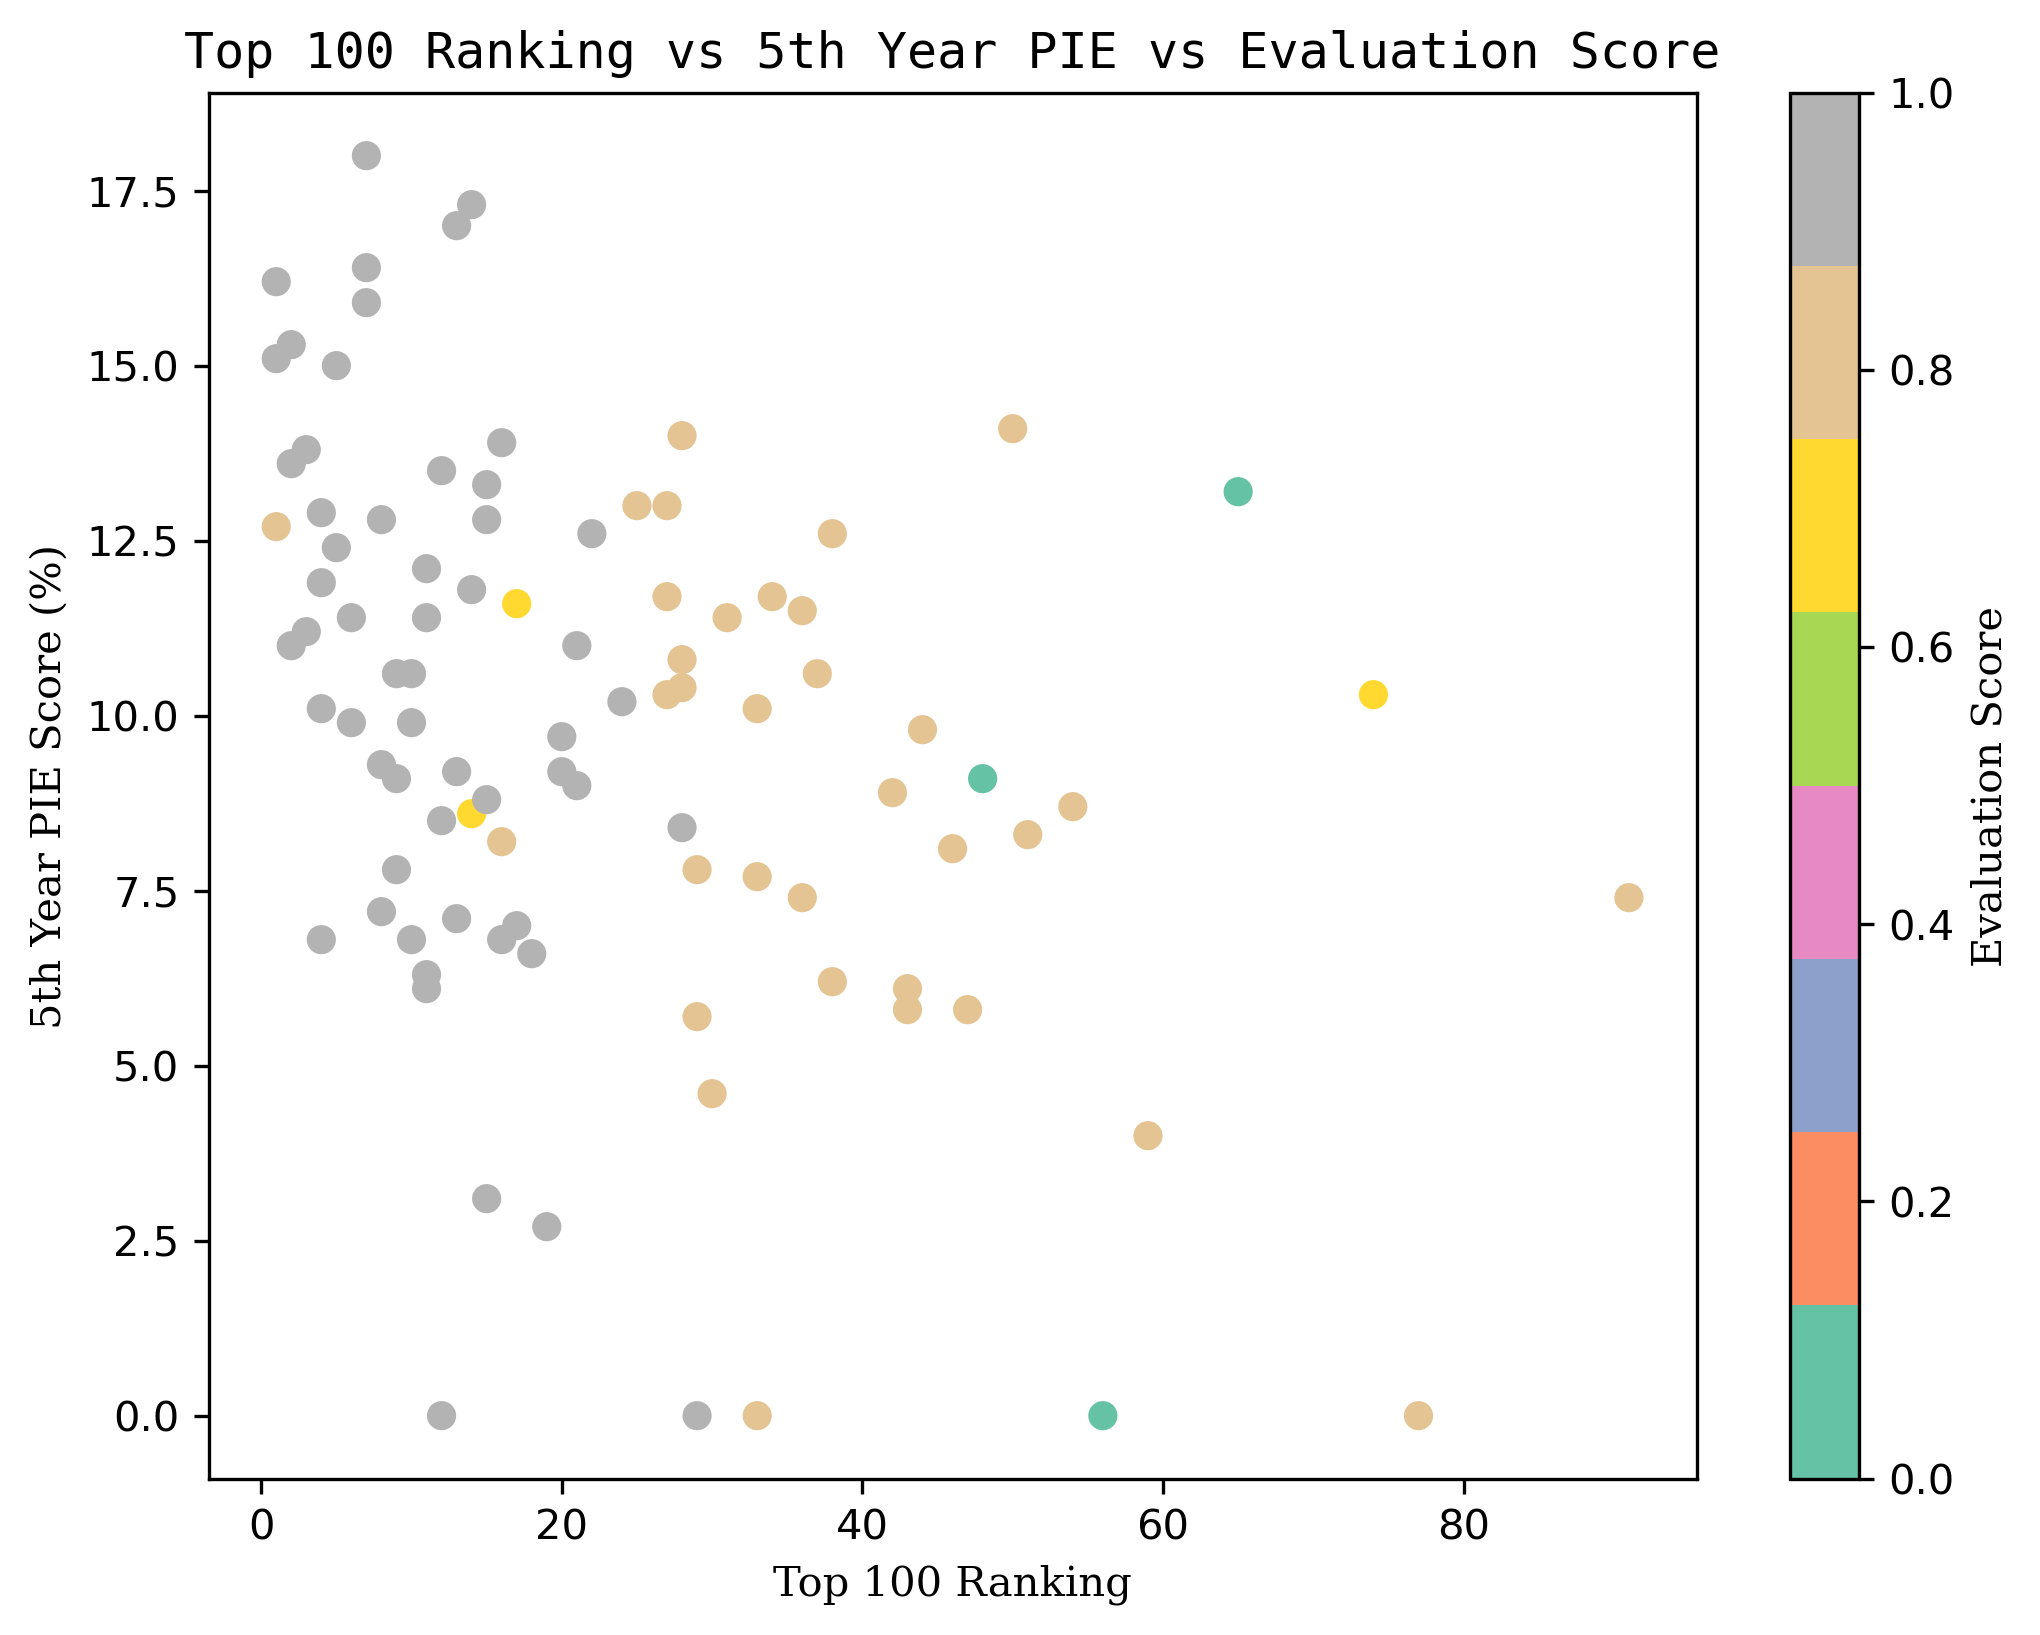

In [6]:
def remove(string):
    return string.replace(" ", "")

def NormalizeData(data):
    return (data - min(data)) / (max(data) - min(data))

pie_data = draft_pie_data[draft_pie_data['5th_YR_SALARY_TAG'] != "no contract"]

pie_data = pie_data[pie_data['DRAFT_CLASS'] > 2008]

pie_names = []
for x in pie_data['PLAYER_NAME_x']:
    pie_names.append(remove(x))
#print(len(pie_data))
pie_data['NS_NAMES'] = pie_names
#ranking_data['PIE'] = draft_pie_data[draft_pie_data['PLAYER_NAME_x'].isin(draft_ranking_data['NAME'])['PIE_5_YR']]
pie_data = pie_data[pie_data['NS_NAMES'].isin(draft_ranking_data['NAME'])]
ranking_data = draft_ranking_data[draft_ranking_data['NAME'].isin(pie_data['NS_NAMES'])]

#print(len(pie_names),len(pie_data),len(ranking_data))
#print(len(np.isin(ranking_data['NAME'],pie_data['NS_NAMES'])))
#print(pie_names, ranking_data['NAME'])
#bool_a_b = np.isin(pie_names, ranking_data['NAME'])
#print(bool_a_b, len(bool_a_b),np.where(bool_a_b == False))
#arr = np.where(bool_a_b == False)[0]
#for x in arr:
 #   print(x)
  #  print(pie_names[x])
#2,24,25,70,76,90
ranking_pie = []
for x in ranking_data['NAME']:
    ranking_pie.append(pie_data[pie_data['NS_NAMES'] == x]['PIE_5_YR'].values[0])
    
#print(ranking_pie, len(ranking_pie))
grade = NormalizeData(ranking_data['GRADE'])
#print(pie_data['NS_NAMES'],ranking_data['NAME'])
plt.figure(dpi=300,figsize=figure_size)
#plt.grid()
plt.scatter(x=ranking_data['BIG_BOARD'], y=ranking_pie, c=grade, cmap="Set2")
plt.colorbar().set_label(label="Evaluation Score",font = label_font, size = label_font_size)
plt.xlabel("Top 100 Ranking", font = label_font, fontsize = label_font_size)
plt.ylabel("5th Year PIE Score (%)",font = label_font,fontsize = label_font_size)
plt.title("Top 100 Ranking vs 5th Year PIE vs Evaluation Score", font = t_font, fontsize = t_font_size)
plt.show()

# ranking vs pie score vs salary

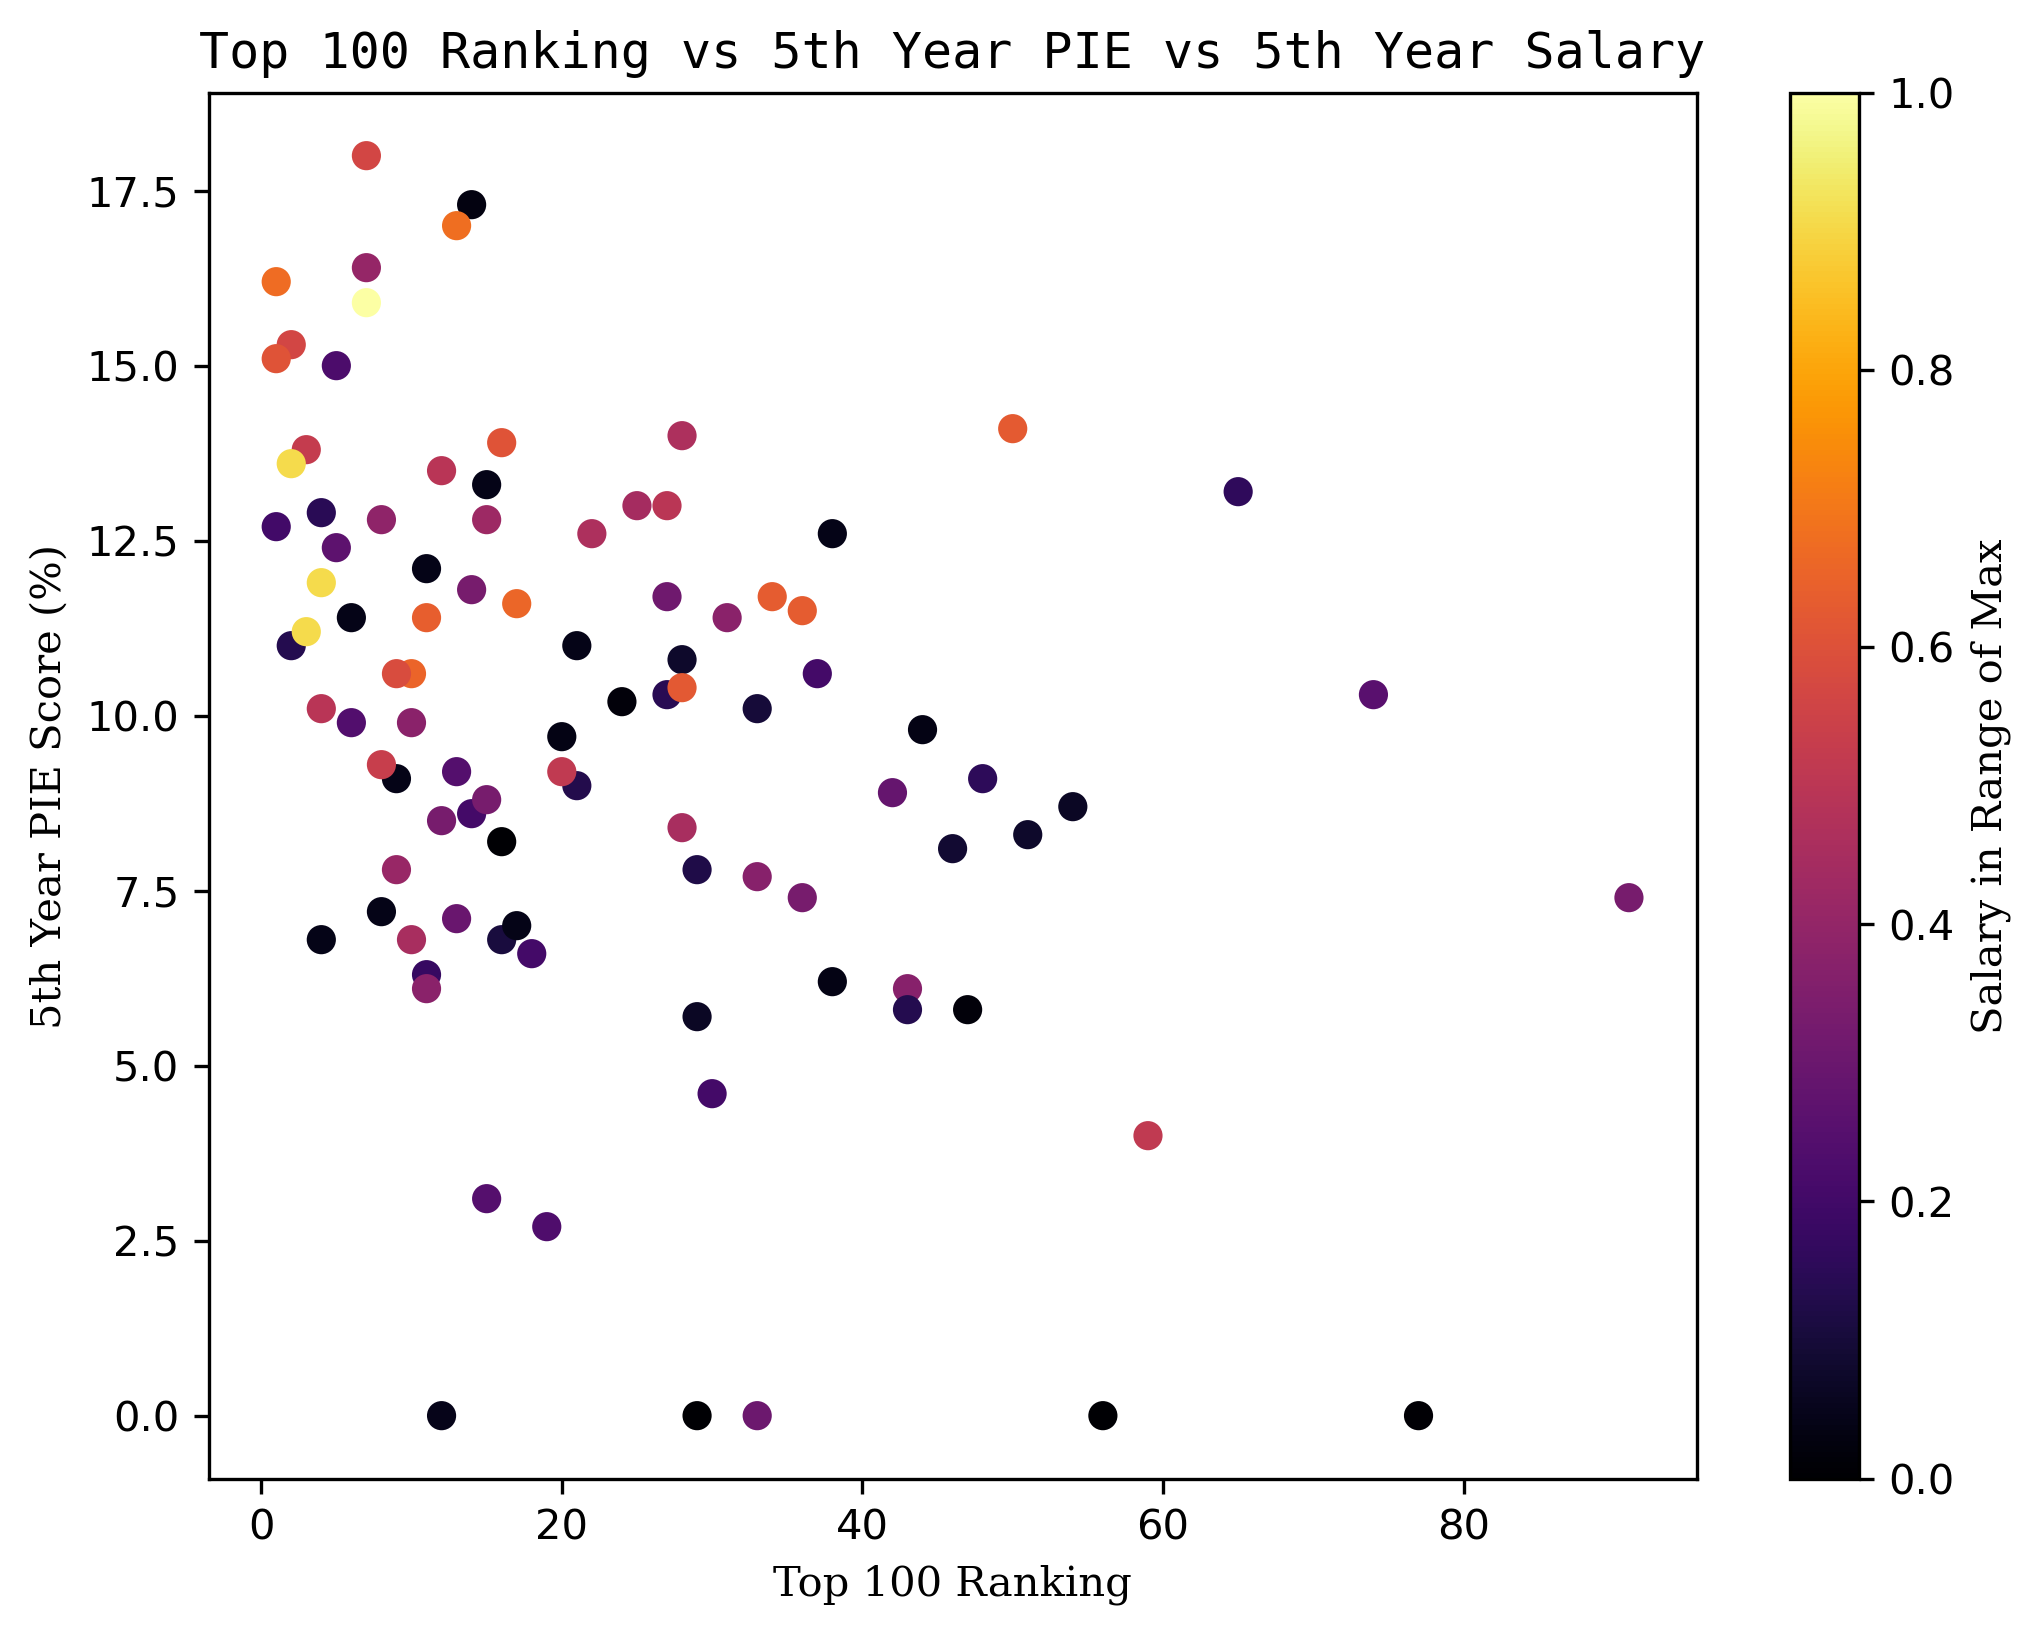

In [7]:
def remove(string):
    return string.replace(" ", "")

def NormalizeData(data):
    return (data - min(data)) / (max(data) - min(data))

pie_data = draft_pie_data[draft_pie_data['5th_YR_SALARY_TAG'] != "no contract"]

pie_data = pie_data[pie_data['DRAFT_CLASS'] > 2008]

pie_names = []
for x in pie_data['PLAYER_NAME_x']:
    pie_names.append(remove(x))
#print(len(pie_data))
pie_data['NS_NAMES'] = pie_names
#ranking_data['PIE'] = draft_pie_data[draft_pie_data['PLAYER_NAME_x'].isin(draft_ranking_data['NAME'])['PIE_5_YR']]
pie_data = pie_data[pie_data['NS_NAMES'].isin(draft_ranking_data['NAME'])]
ranking_data = draft_ranking_data[draft_ranking_data['NAME'].isin(pie_data['NS_NAMES'])]

#print(len(pie_names),len(pie_data),len(ranking_data))
#print(len(np.isin(ranking_data['NAME'],pie_data['NS_NAMES'])))
#print(pie_names, ranking_data['NAME'])
#bool_a_b = np.isin(pie_names, ranking_data['NAME'])
#print(bool_a_b, len(bool_a_b),np.where(bool_a_b == False))
#arr = np.where(bool_a_b == False)[0]
#for x in arr:
 #   print(x)
  #  print(pie_names[x])
#2,24,25,70,76,90
ranking_pie = []
ranking_salary = []
for x in ranking_data['NAME']:
    ranking_pie.append(pie_data[pie_data['NS_NAMES'] == x]['PIE_5_YR'].values[0])
    ranking_salary.append(pie_data[pie_data['NS_NAMES'] == x]['5th_YR_SALARY'].values[0])
    
#print(ranking_pie, len(ranking_pie))
salary = NormalizeData(ranking_salary)
#print(pie_data['NS_NAMES'],ranking_data['NAME'])
plt.figure(dpi=300,figsize=figure_size)
#plt.grid()
plt.scatter(x=ranking_data['BIG_BOARD'], y=ranking_pie, c=salary, cmap="inferno")
plt.colorbar().set_label(label="Salary in Range of Max",font = label_font, size = label_font_size)
plt.xlabel("Top 100 Ranking", font = label_font, fontsize = label_font_size)
plt.ylabel("5th Year PIE Score (%)",font = label_font,fontsize = label_font_size)
plt.title("Top 100 Ranking vs 5th Year PIE vs 5th Year Salary", font = t_font, fontsize = t_font_size)
plt.show()